In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from datetime import datetime


plt.rcParams['font.sans-serif'] = ['SimHei']

plt.rcParams['axes.unicode_minus'] = False #正常显示负号

pd.set_option('display.float_format',lambda x : '%.2f' % x)#pandas禁用科学计数法

#忽略警告
import warnings
warnings.filterwarnings('ignore')

In [6]:
data=pd.read_csv('C:/Users/DaiSimon/Desktop/数据分析/RFM/电子产品销售分析.csv',index_col=0,dtype={'category_id':'int64','user_id':'int64'},encoding='utf8')

In [7]:
data.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2268105426648171520,electronics.tablet,samsung,162.01,1515915625441993984,24.00,女,海南
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2268105426648171520,electronics.tablet,samsung,162.01,1515915625441993984,24.00,女,海南
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2268105430162997248,electronics.audio.headphone,huawei,77.52,1515915625447879424,38.00,女,北京
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2268105430162997248,electronics.audio.headphone,huawei,77.52,1515915625447879424,38.00,女,北京
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2268105471367840000,NaN,karcher,217.57,1515915625443148032,32.00,女,广东


In [9]:
data['date']=data.event_time.apply(lambda x: x.split(' ')[0])

In [11]:
data['date']= pd.to_datetime(data['date'])#创建日期列

In [16]:
data['month']=data.date.dt.month

In [17]:
data['hour'] = data.event_time.apply(lambda x: x.split(' ')[1].split(':')[0])

In [18]:
data['weekday'] = data.date.apply(lambda x:x.strftime("%w"))
data.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local,date,month,hour,weekday
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2268105426648171520,electronics.tablet,samsung,162.01,1515915625441993984,24.00,女,海南,2020-04-24,4,11,5
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2268105426648171520,electronics.tablet,samsung,162.01,1515915625441993984,24.00,女,海南,2020-04-24,4,11,5
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2268105430162997248,electronics.audio.headphone,huawei,77.52,1515915625447879424,38.00,女,北京,2020-04-24,4,14,5
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2268105430162997248,electronics.audio.headphone,huawei,77.52,1515915625447879424,38.00,女,北京,2020-04-24,4,14,5
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2268105471367840000,NaN,karcher,217.57,1515915625443148032,32.00,女,广东,2020-04-24,4,19,5


In [19]:
del data['event_time']

In [20]:
data.head()

,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local,date,month,hour,weekday
0,2294359932054536986,1515966223509089906,2268105426648171520,electronics.tablet,samsung,162.01,1515915625441993984,24.00,女,海南,2020-04-24,4,11,5
1,2294359932054536986,1515966223509089906,2268105426648171520,electronics.tablet,samsung,162.01,1515915625441993984,24.00,女,海南,2020-04-24,4,11,5
2,2294444024058086220,2273948319057183658,2268105430162997248,electronics.audio.headphone,huawei,77.52,1515915625447879424,38.00,女,北京,2020-04-24,4,14,5
3,2294444024058086220,2273948319057183658,2268105430162997248,electronics.audio.headphone,huawei,77.52,1515915625447879424,38.00,女,北京,2020-04-24,4,14,5
4,2294584263154074236,2273948316817424439,2268105471367840000,NaN,karcher,217.57,1515915625443148032,32.00,女,广东,2020-04-24,4,19,5


In [21]:
data.shape


(564169, 14)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564169 entries, 0 to 2633520
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   order_id       564169 non-null  int64         
 1   product_id     564169 non-null  int64         
 2   category_id    564169 non-null  int64         
 3   category_code  434799 non-null  object        
 4   brand          536945 non-null  object        
 5   price          564169 non-null  float64       
 6   user_id        564169 non-null  int64         
 7   age            564169 non-null  float64       
 8   sex            564169 non-null  object        
 9   local          564169 non-null  object        
 10  date           564169 non-null  datetime64[ns]
 11  month          564169 non-null  int64         
 12  hour           564169 non-null  object        
 13  weekday        564169 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(

In [23]:
data['category_code'] = data['category_code'].fillna("R")#用R填补缺失值

In [24]:
data = data[data.brand.notnull()]#删除brand这一列有缺失值的数据

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536945 entries, 0 to 2633520
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   order_id       536945 non-null  int64         
 1   product_id     536945 non-null  int64         
 2   category_id    536945 non-null  int64         
 3   category_code  536945 non-null  object        
 4   brand          536945 non-null  object        
 5   price          536945 non-null  float64       
 6   user_id        536945 non-null  int64         
 7   age            536945 non-null  float64       
 8   sex            536945 non-null  object        
 9   local          536945 non-null  object        
 10  date           536945 non-null  datetime64[ns]
 11  month          536945 non-null  int64         
 12  hour           536945 non-null  object        
 13  weekday        536945 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(

In [26]:
data.duplicated().sum()

634

In [27]:
data.duplicated()

0          False
1           True
2          False
3           True
4          False
           ...  
2633516    False
2633517    False
2633518    False
2633519    False
2633520    False
Length: 536945, dtype: bool

In [28]:
data = data.value_counts().reset_index().rename(columns={0:'buy_cnt'})

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [29]:
df = data.groupby(['order_id','product_id']).agg(buy_cnt=('user_id','count'))
data = pd.merge(data,df,on=['order_id','product_id'],how='inner')
data = data.drop_duplicates().reset_index(drop=True)

In [30]:
data['amount'] = data['price'] * data['buy_cnt']#新列，购买总金额

In [31]:
data.order_id = data.order_id.astype('object')
data.product_id = data.product_id.astype('object')
data.category_id = data.category_id.astype('object')
data.user_id = data.user_id.astype('object')#把几个id的格式转化为object格式

In [32]:
data['hour'] = data.loc[:,'hour'].astype('int')
data['weekday'] = data.loc[:,'weekday'].astype('int')

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536311 entries, 0 to 536310
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   order_id       536311 non-null  object        
 1   product_id     536311 non-null  object        
 2   category_id    536311 non-null  object        
 3   category_code  536311 non-null  object        
 4   brand          536311 non-null  object        
 5   price          536311 non-null  float64       
 6   user_id        536311 non-null  object        
 7   age            536311 non-null  float64       
 8   sex            536311 non-null  object        
 9   local          536311 non-null  object        
 10  date           536311 non-null  datetime64[ns]
 11  month          536311 non-null  int64         
 12  hour           536311 non-null  int32         
 13  weekday        536311 non-null  int32         
 14  buy_cnt        536311 non-null  int64         
 15  

In [34]:
data.describe(percentiles=[0.01,0.25,0.75,0.99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
price,536311.00,214.54,305.98,0.00,1.13,24.51,99.51,289.33,1387.01,11574.05
age,536311.00,33.18,10.12,16.00,16.00,24.00,33.00,42.00,50.00,50.00
month,536311.00,7.72,2.56,1.00,1.00,6.00,8.00,10.00,11.00,11.00
hour,536311.00,9.52,4.21,0.00,1.00,6.00,9.00,12.00,22.00,23.00
weekday,536311.00,3.03,2.04,0.00,0.00,1.00,3.00,5.00,6.00,6.00
buy_cnt,536311.00,1.00,0.04,1.00,1.00,1.00,1.00,1.00,1.00,4.00
amount,536311.00,214.73,306.48,0.00,1.13,24.98,99.51,289.33,1387.01,11574.05


In [35]:
data.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
order_id,536311.00,389511.00,2388440981134689792.00,47.00,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_id,536311.00,19078.00,1515966223517847040.00,2755.00,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category_id,536311.00,786.00,2268105428166508800.00,101081.00,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category_code,536311,124,R,116093,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,536311,868,samsung,96123,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,536311.00,NaN,NaN,NaN,NaT,NaT,214.54,305.98,0.00,24.51,99.51,289.33,11574.05
user_id,536311.00,92769.00,1515915625512422912.00,1026.00,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,536311.00,NaN,NaN,NaN,NaT,NaT,33.18,10.12,16.00,24.00,33.00,42.00,50.00
sex,536311,2,男,270454,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
local,536311,11,广东,117097,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
data = data[data.date>'1970-01-01']#删除这个异常值

In [37]:
data.date.min()

Timestamp('2020-01-05 00:00:00')

In [38]:
data.head()

,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local,date,month,hour,weekday,buy_cnt,amount
0,2294359932054536986,1515966223509089906,2268105426648171520,electronics.tablet,samsung,162.01,1515915625441993984,24.00,女,海南,2020-04-24,4,11,5,2,324.02
1,2294444024058086220,2273948319057183658,2268105430162997248,electronics.audio.headphone,huawei,77.52,1515915625447879424,38.00,女,北京,2020-04-24,4,14,5,2,155.04
2,2294584263154074236,2273948316817424439,2268105471367840000,R,karcher,217.57,1515915625443148032,32.00,女,广东,2020-04-24,4,19,5,1,217.57
3,2295716521449619559,1515966223509261697,2268105442636858112,furniture.kitchen.table,maestro,39.33,1515915625450382848,20.00,男,重庆,2020-04-26,4,8,0,1,39.33
4,2295740594749702229,1515966223509104892,2268105428166508800,electronics.smartphone,apple,1387.01,1515915625448766464,21.00,男,北京,2020-04-26,4,9,0,4,5548.04


In [39]:
data.shape

(535065, 16)

In [40]:
data.reset_index(drop=True,inplace=True)

In [41]:
data.to_csv('data_clean.csv',index=False)#至此，数据清洗完成

In [42]:
round(data['amount'].sum(),0)

114986636.0

In [43]:
GMV_month = data.groupby('month').agg(GMV=('amount','sum'))
GMV_month

,GMV
month,
1,1729464.93
2,2216672.31
3,2841015.58
4,1674450.68
5,7657332.51
6,7489312.32
7,16048807.99
8,27380899.66
9,16797132.61


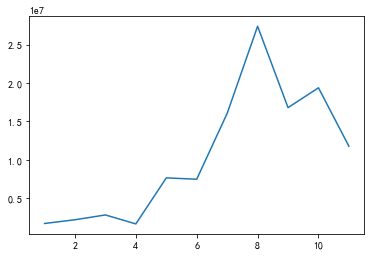

In [44]:
plt.plot(GMV_month.index,GMV_month['GMV'])
plt.show()

In [45]:
round(data['amount'].sum() / data['user_id'].nunique(),0)

1240.0

In [46]:
round(data['amount'].sum() / data['order_id'].nunique(),0)

296.0

In [47]:
data = pd.read_csv('data_clean.csv')

In [48]:
data['date'] = pd.to_datetime(data['date'])

In [49]:
data.user_id.nunique()

92755

In [50]:
local = data.groupby('local')['user_id'].nunique().reset_index()
local = local.rename(columns={'user_id':'用户数量'})
local = local.sort_values('用户数量').reset_index(drop=True)

In [51]:
local

,local,用户数量
0,湖南,5330
1,天津,5337
2,重庆,5342
3,湖北,5355
4,浙江,5370
5,四川,5445
6,海南,5449
7,江苏,5561
8,北京,15928
9,上海,16031


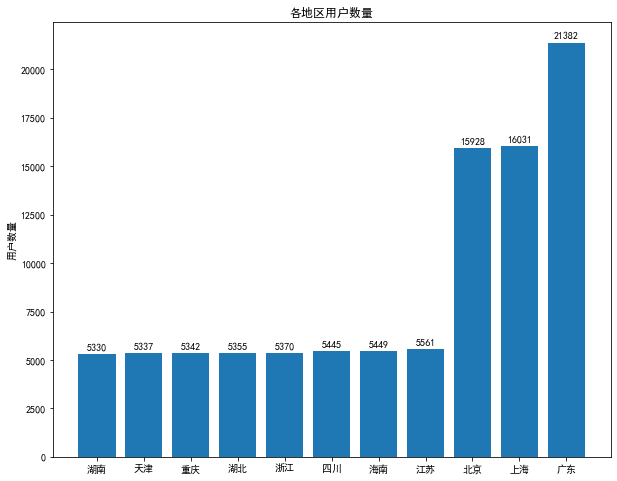

In [52]:
plt.figure(figsize=(10,8))
plt.ylabel('用户数量')
plt.title('各地区用户数量')
plt.bar(local['local'],local['用户数量'])
for x,y in enumerate(local['用户数量']):
    plt.text(x,y+200,y,ha='center')
plt.show()

In [53]:
population = pd.read_excel('./2020年各省人口数量.xlsx')
population = population.iloc[:,:2]
population.head()

,地区,人口数
0,全国,1411778724
1,广东,126012510
2,山东,101527453
3,河南,99365519
4,江苏,84748016


In [54]:
local = pd.merge(local,population,how='inner',left_on='local',right_on='地区')

In [56]:
local['占比'] = round(local['用户数量'] / local['人口数'],5)
local = local.sort_values('占比',ascending=False).reset_index(drop=True)
local

,local,用户数量,地区,人口数,占比
0,北京,15928,北京,21893095,0.00
1,上海,16031,上海,24870895,0.00
2,海南,5449,海南,10081232,0.00
3,天津,5337,天津,13866009,0.00
4,广东,21382,广东,126012510,0.00
5,重庆,5342,重庆,32054159,0.00
6,湖北,5355,湖北,57752557,0.00
7,浙江,5370,浙江,64567588,0.00
8,湖南,5330,湖南,66444864,0.00
9,江苏,5561,江苏,84748016,0.00


In [57]:
sex =  data.groupby('sex')['user_id'].nunique().reset_index()
sex.rename(columns={'user_id':'用户数量'},inplace=True)
sex

,sex,用户数量
0,女,47235
1,男,47628


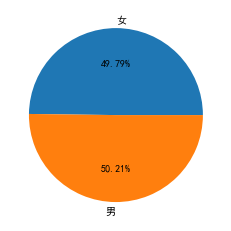

In [58]:
plt.pie(sex['用户数量'],labels=sex['sex'],autopct='%1.2f%%')
plt.show()

In [59]:
data.age.min()

16.0

In [60]:
data.age.max()

50.0

In [61]:
bins = [15,20,25,30,35,40,45,50]
labels = ['(15-20]岁','(20-25]岁','(25-30]岁','(30-35]岁','(35-40]岁','(40-45]岁','(45-50]岁']
data_ = data.copy()
data_['age_bin'] = pd.cut(x=data.age,bins=bins,right=True,labels=labels)
data_

,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local,date,month,hour,weekday,buy_cnt,amount,age_bin
0,2294359932054536986,1515966223509089906,2268105426648171520,electronics.tablet,samsung,162.01,1515915625441993984,24.00,女,海南,2020-04-24,4,11,5,2,324.02,(20-25]岁
1,2294444024058086220,2273948319057183658,2268105430162997248,electronics.audio.headphone,huawei,77.52,1515915625447879424,38.00,女,北京,2020-04-24,4,14,5,2,155.04,(35-40]岁
2,2294584263154074236,2273948316817424439,2268105471367840000,R,karcher,217.57,1515915625443148032,32.00,女,广东,2020-04-24,4,19,5,1,217.57,(30-35]岁
3,2295716521449619559,1515966223509261697,2268105442636858112,furniture.kitchen.table,maestro,39.33,1515915625450382848,20.00,男,重庆,2020-04-26,4,8,0,1,39.33,(15-20]岁
4,2295740594749702229,1515966223509104892,2268105428166508800,electronics.smartphone,apple,1387.01,1515915625448766464,21.00,男,北京,2020-04-26,4,9,0,4,5548.04,(20-25]岁
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535060,2388440981134693942,1515966223526602848,2268105428166508800,electronics.smartphone,oppo,138.87,1515915625514888704,21.00,男,上海,2020-11-21,11,10,6,1,138.87,(20-25]岁
535061,2388440981134693943,1515966223509089282,2268105428166508800,electronics.smartphone,apple,418.96,1515915625514891264,21.00,女,北京,2020-11-21,11,10,6,1,418.96,(20-25]岁
535062,2388440981134693944,1515966223509089917,2268105402447036928,appliances.personal.scales,vitek,12.48,1515915625514834176,19.00,女,上海,2020-11-21,11,10,6,1,12.48,(15-20]岁
535063,2388440981134693944,2273948184839454837,2268105440371933952,R,moulinex,41.64,1515915625514834176,19.00,女,上海,2020-11-21,11,10,6,1,41.64,(15-20]岁


In [62]:
age = data_.groupby('age_bin')['user_id'].nunique().reset_index()
age.rename(columns={'user_id':'用户数量'},inplace=True)
age

,age_bin,用户数量
0,(15-20]岁,13726
1,(20-25]岁,13867
2,(25-30]岁,13831
3,(30-35]岁,13802
4,(35-40]岁,13775
5,(40-45]岁,13969
6,(45-50]岁,13535


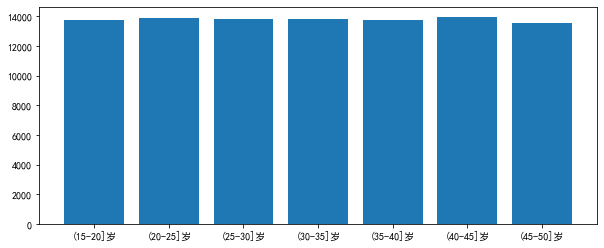

In [63]:
plt.figure(figsize=(10,4))
plt.bar(age['age_bin'],age['用户数量'])
plt.show()

In [64]:
data_.groupby('age')['user_id'].nunique().reset_index()

,age,user_id
0,16.00,2797
1,17.00,2725
2,18.00,2759
3,19.00,2703
4,20.00,2838
5,21.00,2786
6,22.00,2792
7,23.00,2820
8,24.00,2764
9,25.00,2768


In [65]:
age_bin_data = data_.groupby('age_bin').agg(消费金额=('amount','sum'),下单次数=('order_id','nunique'))
age_bin_data

,消费金额,下单次数
age_bin,,
(15-20]岁,16007287.18,54302
(20-25]岁,16500743.70,55546
(25-30]岁,16513446.00,54723
(30-35]岁,17004578.70,58275
(35-40]岁,14995577.44,49744
(40-45]岁,17078724.54,59067
(45-50]岁,16886278.32,57085


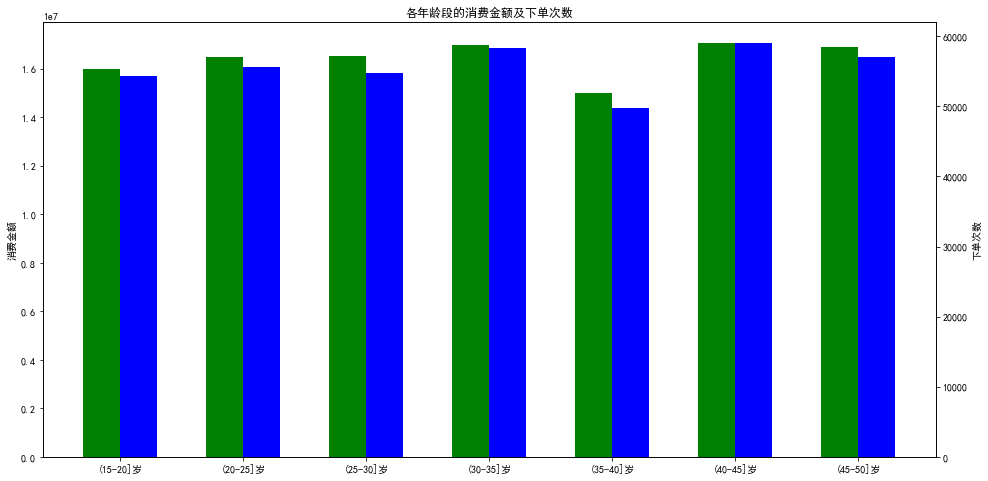

In [66]:
fig,ax1 = plt.subplots(figsize=(16,8))
xticks = np.arange(len(age_bin_data.index))

ax1.bar(xticks,age_bin_data.消费金额,width=0.3,color='g')
ax1.set_ylabel('消费金额')
ax2 = ax1.twinx()

ax2.bar(xticks+0.3,age_bin_data.下单次数,width=0.3,color='b')
ax2.set_ylabel('下单次数')
plt.title('各年龄段的消费金额及下单次数')

ax1.set_xticks(xticks+0.15)
ax1.set_xticklabels(age_bin_data.index)
plt.show()

In [67]:
user_28 = data.groupby('user_id').agg(消费金额=('amount','sum')).sort_values('消费金额',ascending=False).reset_index()
user_28['累计销售额'] = user_28['消费金额'].cumsum()
user_28

,user_id,消费金额,累计销售额
0,1515915625512422912,160604.07,160604.07
1,1515915625513695488,158277.37,318881.44
2,1515915625512377088,149967.06,468848.50
3,1515915625513577472,135672.84,604521.34
4,1515915625514597888,133945.88,738467.22
...,...,...,...
92750,1515915625511079936,0.02,114986635.82
92751,1515915625450548736,0.02,114986635.84
92752,1515915625506653440,0.02,114986635.86
92753,1515915625451367168,0.02,114986635.88


In [68]:
p = user_28['消费金额'].cumsum()/user_28['消费金额'].sum()  # 创建累计占比，Series
key = p[p>0.8].index[0] 
key

25408

In [69]:
key / user_28.shape[0]

0.2739259339119185

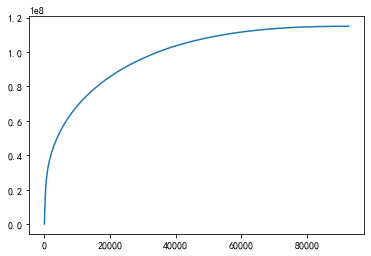

In [70]:
plt.plot(user_28.index,user_28['累计销售额'])
plt.show()

In [76]:
data.groupby('user_id').agg(消费金额=('amount','sum')).describe(percentiles=(0.01,0.1,0.25,0.75,0.9,0.99)).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
消费金额,92755.00,1239.68,4129.72,0.00,6.00,41.64,148.11,456.89,1141.17,2402.53,12744.87,160604.07


In [77]:
user_rfm = data.groupby(['user_id','date']).agg(消费金额=('amount','sum')).reset_index()
user_rfm.head()

,user_id,date,消费金额
0,1515915625439951872,2020-07-09,416.64
1,1515915625440038400,2020-09-22,21.04
2,1515915625440038400,2020-10-28,35.39
3,1515915625440051712,2020-10-23,972.16
4,1515915625440051712,2020-11-16,6517.37


In [78]:
user_rfm = user_rfm.groupby('user_id').agg(最后购买日期=('date','max')
                                           ,M=('消费金额','sum')
                                           ,F=('date','count')
                                          ).reset_index()
user_rfm

,user_id,最后购买日期,M,F
0,1515915625439951872,2020-07-09,416.64,1
1,1515915625440038400,2020-10-28,56.43,2
2,1515915625440051712,2020-11-16,7489.53,2
3,1515915625440099840,2020-11-08,4929.86,12
4,1515915625440121600,2020-07-14,182.83,2
...,...,...,...,...
92750,1515915625514887424,2020-11-21,208.31,1
92751,1515915625514887936,2020-11-21,3472.20,1
92752,1515915625514888704,2020-11-21,752.49,1
92753,1515915625514891008,2020-11-21,925.67,1


In [79]:
user_rfm['最后购买日期'] = pd.to_datetime(user_rfm['最后购买日期'])

In [80]:
user_rfm['R'] = user_rfm['最后购买日期'].apply(lambda x:user_rfm['最后购买日期'].max() - x)

In [81]:
user_rfm['R'] = user_rfm['R'].dt.days

In [82]:
user_rfm = user_rfm[['user_id','R','F','M']]

In [83]:
user_rfm

,user_id,R,F,M
0,1515915625439951872,135,1,416.64
1,1515915625440038400,24,2,56.43
2,1515915625440051712,5,2,7489.53
3,1515915625440099840,13,12,4929.86
4,1515915625440121600,130,2,182.83
...,...,...,...,...
92750,1515915625514887424,0,1,208.31
92751,1515915625514887936,0,1,3472.20
92752,1515915625514888704,0,1,752.49
92753,1515915625514891008,0,1,925.67


In [84]:
user_rfm['user_id'] = user_rfm['user_id'].astype('object')

In [85]:
user_rfm.describe(percentiles=(0.01,0.1,0.25,0.75,0.9,0.95,0.99)).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
R,92755.00,98.59,54.53,0.00,2.00,24.00,61.00,101.00,127.00,180.00,196.00,211.00,321.00
F,92755.00,2.51,4.56,1.00,1.00,1.00,1.00,1.00,3.00,4.00,6.00,17.00,159.00
M,92755.00,1239.68,4129.72,0.00,6.00,41.64,148.11,456.89,1141.17,2402.53,3823.67,12744.87,160604.07


#R的打分:
[0-30]:5分
(30-60]:4分
(60-90]:3分
(90-120]:2分
120以上:1分

F的打分:
1次:1分
2次:2分
3次:3分
4次:4分
5次及以上:5分

M的打分:
[0-200]:1分
(200-500]:2分
(500-1000]:3分
(1000-2000]:4分
2000以上:5分

In [86]:
rfm_score = user_rfm.copy()

In [87]:
for i,j in enumerate(rfm_score['R']):
    if j <= 30:
        rfm_score['R'][i] = 5
    elif j <= 60:
        rfm_score['R'][i] = 4
    elif j <= 90:
        rfm_score['R'][i] = 3
    elif j <= 120:
        rfm_score['R'][i] = 2
    else :
        rfm_score['R'][i] = 1

In [88]:
for i,j in enumerate(rfm_score['F']):
    if j <= 1:
        rfm_score['F'][i] = 1
    elif j <= 2:
        rfm_score['F'][i] = 2
    elif j <= 3:
        rfm_score['F'][i] = 3
    elif j <= 4:
        rfm_score['F'][i] = 4
    else :
        rfm_score['F'][i] = 5

In [90]:
for i,j in enumerate(rfm_score['M']):
    if j <= 200:
        rfm_score['M'][i] = 1
    elif j <= 500:
        rfm_score['M'][i] = 2
    elif j <= 1000:
        rfm_score['M'][i] = 3
    elif j <= 2000:
        rfm_score['M'][i] = 4
    else :
        rfm_score['M'][i] = 5

In [91]:
rfm_score

,user_id,R,F,M
0,1515915625439951872,1,1,1.00
1,1515915625440038400,5,2,1.00
2,1515915625440051712,5,2,2.00
3,1515915625440099840,5,5,2.00
4,1515915625440121600,1,2,1.00
...,...,...,...,...
92750,1515915625514887424,5,1,1.00
92751,1515915625514887936,5,1,2.00
92752,1515915625514888704,5,1,1.00
92753,1515915625514891008,5,1,1.00


In [92]:
rfm_score['R'].mean()

2.498830251738451

In [93]:
rfm_score['F'].mean()

1.996366772680718

In [94]:
rfm_score['M'].mean()

1.1267963991159506

In [97]:
rfm = pd.DataFrame()
rfm['user_id'] = rfm_score['user_id']
rfm['R'] = rfm_score['R'].apply(lambda x: '1' if x >= rfm_score['R'].mean() else '0')
rfm['F'] = rfm_score['F'].apply(lambda x: '1' if x >= rfm_score['F'].mean() else '0')
rfm['M'] = rfm_score['M'].apply(lambda x: '1' if x >= rfm_score['M'].mean() else '0')

In [98]:
rfm

,user_id,R,F,M
0,1515915625439951872,0,0,0
1,1515915625440038400,1,1,0
2,1515915625440051712,1,1,1
3,1515915625440099840,1,1,1
4,1515915625440121600,0,1,0
...,...,...,...,...
92750,1515915625514887424,1,0,0
92751,1515915625514887936,1,0,1
92752,1515915625514888704,1,0,0
92753,1515915625514891008,1,0,0


In [99]:
rfm['result'] = rfm['R'] + rfm['F'] + rfm['M']
rfm

,user_id,R,F,M,result
0,1515915625439951872,0,0,0,000
1,1515915625440038400,1,1,0,110
2,1515915625440051712,1,1,1,111
3,1515915625440099840,1,1,1,111
4,1515915625440121600,0,1,0,010
...,...,...,...,...,...
92750,1515915625514887424,1,0,0,100
92751,1515915625514887936,1,0,1,101
92752,1515915625514888704,1,0,0,100
92753,1515915625514891008,1,0,0,100


In [100]:
for i,j in enumerate(rfm['result']):
    if j == '111':
        rfm['result'][i] = '重要价值客户'
    elif j == '101':
        rfm['result'][i] = '重要发展客户'
    elif j == '011':
        rfm['result'][i] = '重要保持客户'
    elif j == '001':
        rfm['result'][i] = '重要挽留客户'
    elif j == '110':
        rfm['result'][i] = '一般价值客户'
    elif j == '100':
        rfm['result'][i] = '一般发展客户'
    elif j == '010':
        rfm['result'][i] = '一般保持客户'
    elif j == '000':
        rfm['result'][i] = '一般挽留客户'

In [101]:
rfm = rfm[['user_id','result']]

In [102]:
rfm

,user_id,result
0,1515915625439951872,一般挽留客户
1,1515915625440038400,一般价值客户
2,1515915625440051712,重要价值客户
3,1515915625440099840,重要价值客户
4,1515915625440121600,一般保持客户
...,...,...
92750,1515915625514887424,一般发展客户
92751,1515915625514887936,重要发展客户
92752,1515915625514888704,一般发展客户
92753,1515915625514891008,一般发展客户


In [103]:
rfm['result'].value_counts()

一般挽留客户    34618
一般价值客户    17735
一般保持客户    16200
一般发展客户    12441
重要价值客户     8132
重要保持客户     2584
重要挽留客户      559
重要发展客户      486
Name: result, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

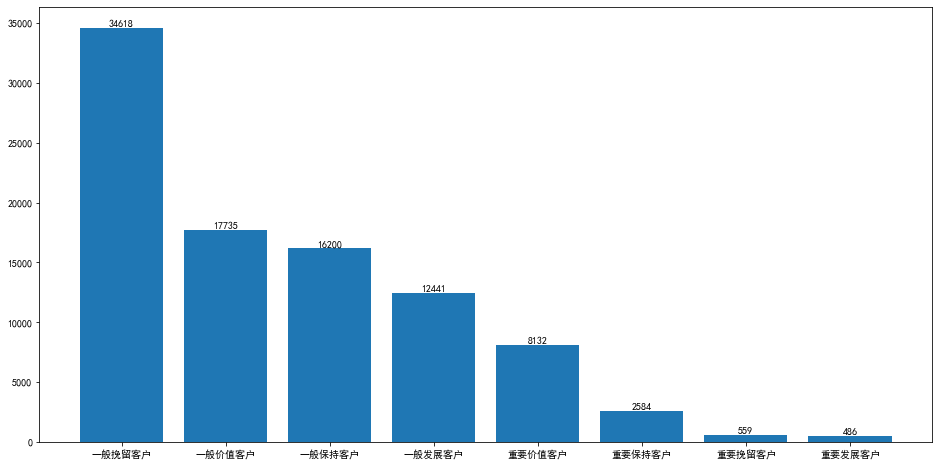

In [104]:
plt.figure(figsize=(16,8))
plt.bar(rfm['result'].value_counts().index,rfm['result'].value_counts().values)
for x,y in enumerate(rfm['result'].value_counts()):
    plt.text(x,y+100,y,ha='center')
plt.show